In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import io
%cd "C:\Users\gmahe\OneDrive\Desktop\new"

C:\Users\gmahe\OneDrive\Desktop\new


In [3]:
housetrain=pd.read_csv("train.csv")

In [4]:
housetest=pd.read_csv("test.csv")

In [5]:
print(housetrain.shape)

(1460, 81)


In [6]:
print(housetest.shape)

(1459, 80)


In [7]:
housetrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
housetest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [9]:
# lagre no .of missing values hence traetment must be done and than EDA.
# since both train and test missing value in similar cloumns/variable ,combine or concatinate both data frames 
#for concatination of two data frames the no.of clomns must be =.
# since test doesnot have dependent variable tempararly add it

In [10]:
#add dependent variable to test data and fill it with word"test"

In [11]:
housetest["SalePrice"]="test"

In [12]:
#concatinate boyh the dataframes-rowwise concatination - axis=0
combineddf=pd.concat([housetrain,housetest],axis=0)

In [13]:
combineddf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [14]:
# split combineddf into 2 dataframews - numcols (numeric data) and objectcols (objest data)
numcols=combineddf.select_dtypes(include=np.number)#np.number select both int 64 and float64
objectcols=combineddf.select_dtypes(include=['object'])

In [15]:
print(numcols.shape)
print(objectcols.shape)

(2919, 37)
(2919, 44)


In [16]:
# check the missing values in object data 
objectcols.isnull().sum().sort_values(ascending=False)/len(objectcols)

PoolQC           0.996574
MiscFeature      0.964029
Alley            0.932169
Fence            0.804385
MasVnrType       0.605002
FireplaceQu      0.486468
GarageCond       0.054471
GarageQual       0.054471
GarageFinish     0.054471
GarageType       0.053786
BsmtCond         0.028092
BsmtExposure     0.028092
BsmtQual         0.027749
BsmtFinType2     0.027407
BsmtFinType1     0.027064
MSZoning         0.001370
Utilities        0.000685
Functional       0.000685
Exterior2nd      0.000343
Electrical       0.000343
SaleType         0.000343
Exterior1st      0.000343
KitchenQual      0.000343
RoofStyle        0.000000
Neighborhood     0.000000
SaleCondition    0.000000
ExterQual        0.000000
LotShape         0.000000
LandContour      0.000000
ExterCond        0.000000
PavedDrive       0.000000
LotConfig        0.000000
LandSlope        0.000000
Condition1       0.000000
HouseStyle       0.000000
Condition2       0.000000
Foundation       0.000000
RoofMatl         0.000000
Street      

In [17]:
# imputing variable poolQv,Alley,fence,miscfearture,masvnrtype,fireplacequ,with word "not avalble" as Na in these variable means feature not available
for col in ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu']:
    objectcols[col]=objectcols[col].fillna("Not Available")

In [18]:
objectcols.isnull().sum().sort_values(ascending=False)

GarageCond       159
GarageQual       159
GarageFinish     159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MSZoning           4
Functional         2
Utilities          2
Electrical         1
KitchenQual        1
SaleType           1
Exterior1st        1
Exterior2nd        1
LotShape           0
FireplaceQu        0
LandContour        0
Condition2         0
Alley              0
CentralAir         0
PoolQC             0
Fence              0
MiscFeature        0
SaleCondition      0
PavedDrive         0
HeatingQC          0
BldgType           0
Heating            0
LotConfig          0
LandSlope          0
Neighborhood       0
Street             0
Condition1         0
Foundation         0
ExterCond          0
ExterQual          0
MasVnrType         0
RoofMatl           0
RoofStyle          0
HouseStyle         0
SalePrice          0
dtype: int64

In [19]:
objectcols.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')

In [20]:
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','GarageType', 'GarageFinish', 'GarageQual','GarageCond']:
    objectcols[col]=objectcols[col].fillna("Not Available")

In [21]:
# imputing remaining small missing values with most_frequent or mode 
for col in objectcols.columns:
    objectcols[col]=objectcols[col].fillna(objectcols[col].value_counts().idxmax())

In [22]:
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
GarageYrBlt      159
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF2         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtUnfSF          1
BsmtFinSF1         1
KitchenAbvGr       0
3SsnPorch          0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [23]:
# imputing Garageyrblt with most_frequent year, as years must be trated as nonnumeric# imputing remaining missing values in numcols with median 

numcols.GarageYrBlt=numcols.GarageYrBlt.fillna(numcols.GarageYrBlt.value_counts().idxmax())

In [24]:
numcols.isnull().sum().sort_values(ascending=False)

LotFrontage      486
MasVnrArea        23
BsmtHalfBath       2
BsmtFullBath       2
BsmtFinSF1         1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
BsmtFinSF2         1
BsmtUnfSF          1
3SsnPorch          0
KitchenAbvGr       0
ScreenPorch        0
EnclosedPorch      0
OpenPorchSF        0
WoodDeckSF         0
PoolArea           0
MiscVal            0
MoSold             0
GarageYrBlt        0
Fireplaces         0
TotRmsAbvGrd       0
Id                 0
BedroomAbvGr       0
HalfBath           0
FullBath           0
MSSubClass         0
GrLivArea          0
LowQualFinSF       0
2ndFlrSF           0
1stFlrSF           0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
LotArea            0
YrSold             0
dtype: int64

In [25]:
for col in numcols.columns:
    numcols[col]=numcols[col].fillna(numcols[col].median())

In [26]:
# create new variable called Age from year variables 
numcols['HouseAge']=numcols.YrSold-numcols.YearBuilt

In [27]:
numcols.HouseAge.describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: HouseAge, dtype: float64

In [28]:
numcols['GarageAge']=numcols.YrSold-numcols.GarageYrBlt

In [29]:
numcols['RemodelAge']=numcols.YrSold-numcols.YearRemodAdd

#Dlelete yrsold,yearbulid,garageyrbulid,yearremodeadd as Age extracted co

In [30]:
# column concatination - side by side pasting of data frames
combineddf_clean=pd.concat([numcols,objectcols],axis=1)

In [31]:
# split Data back to trian and test 
housetrain_df=combineddf_clean[combineddf_clean.SalePrice!="test"]
housetest_df=combineddf_clean[combineddf_clean.SalePrice=="test"]

In [32]:
# Eda must be done on train Data.
# describe() & skew().kurt()-salePrice(y)
# histo,box and densitycurve - saleprice(y)

# correlation anlysis of numric variable incuding heatmap
# frequency counts of obect variables

In [33]:
housetrain_df.SalePrice=pd.to_numeric(housetrain_df.SalePrice)

C:\Users\gmahe\AppData\Local\Temp\ipykernel_14848\2883158072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housetrain_df.SalePrice=pd.to_numeric(housetrain_df.SalePrice)


In [34]:
print(housetrain_df.SalePrice.describe())
print("skewness",housetrain_df.SalePrice.skew())
print("kurtosis",housetrain_df.SalePrice.kurt())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
skewness 1.8828757597682129
kurtosis 6.536281860064529


In [35]:
housetrain_df.SalePrice.kurt

<bound method Series.kurt of 0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64>

In [36]:
import seaborn as sns

<Axes: ylabel='Frequency'>

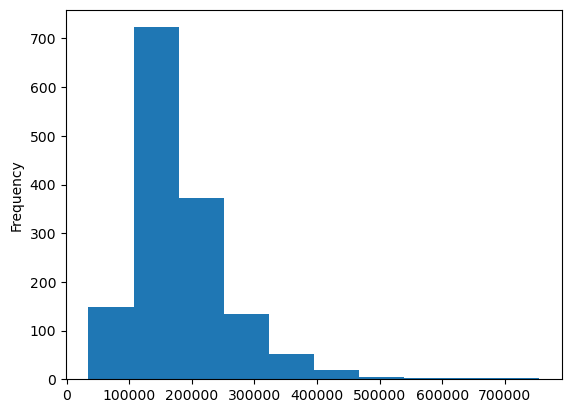

In [37]:
housetrain_df.SalePrice.plot(kind="hist")

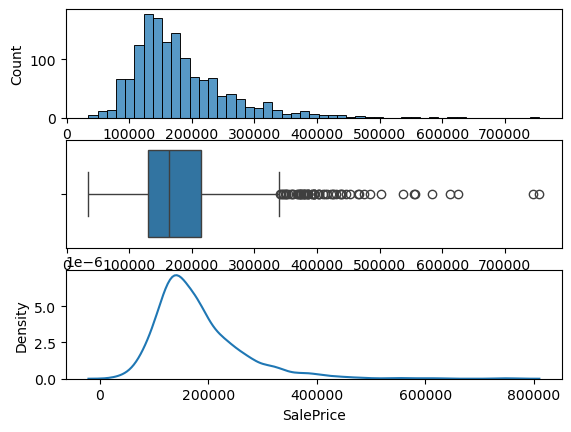

In [38]:
fig,ax=plt.subplots(3,1) # Break Plot window into 3 rows & 1 column
sns.histplot(housetrain_df.SalePrice,ax=ax[0]) # Histogram
sns.boxplot(housetrain_df.SalePrice,ax=ax[1],orient="h") # Boxplot - Horizontal
sns.kdeplot(housetrain_df.SalePrice,ax=ax[2])# density curve
plt.show()

<Axes: ylabel='Density'>

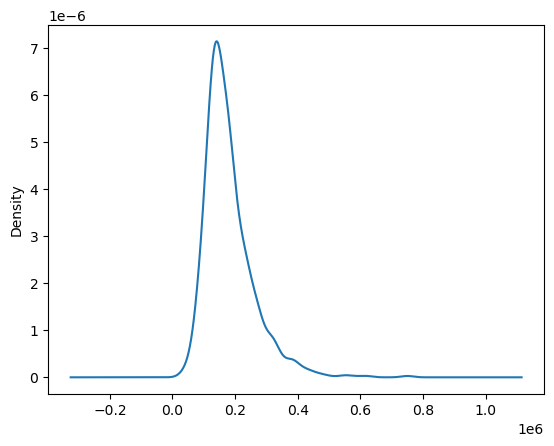

In [39]:
housetrain_df.SalePrice.plot(kind="density")

<Axes: >

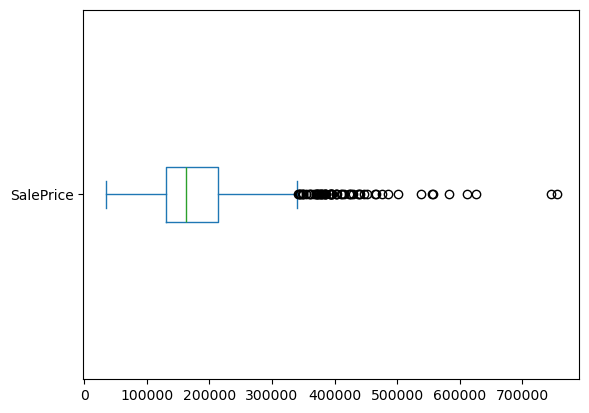

In [40]:
housetrain_df.SalePrice.plot(kind="box",vert=False)

In [41]:
# correlation anlysis
housetrain_df.drop(["Id","YearRemodAdd",'GarageYrBlt','YrSold'],axis=1).select_dtypes(include=np.number).corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,HouseAge,GarageAge,RemodelAge,SalePrice
MSSubClass,1.000000,-0.356286,-0.139781,0.032628,-0.059316,0.027850,0.023573,-0.069836,-0.065649,-0.140759,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.028746,-0.099679,-0.041968,-0.084284
LotFrontage,-0.356286,1.000000,0.302265,0.235326,-0.053703,0.115781,0.178194,0.212909,0.041616,0.125909,...,0.010757,0.061555,0.037616,0.180716,-0.001610,0.010726,-0.115336,-0.038797,-0.083528,0.334544
LotArea,-0.139781,0.302265,1.000000,0.105806,-0.005636,0.014228,0.103321,0.214103,0.111170,-0.002618,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014832,0.041377,-0.014709,0.263843
OverallQual,0.032628,0.235326,0.105806,1.000000,-0.091932,0.572323,0.407252,0.239666,-0.059119,0.308159,...,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.572629,-0.438875,-0.552570,0.790982
OverallCond,-0.059316,-0.053703,-0.005636,-0.091932,1.000000,-0.375983,-0.125694,-0.046231,0.040229,-0.136841,...,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.377325,0.301157,-0.070931,-0.077856
YearBuilt,0.027850,0.115781,0.014228,0.572323,-0.375983,1.000000,0.311600,0.249503,-0.049107,0.149040,...,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.999036,-0.699888,-0.593868,0.522897
MasVnrArea,0.023573,0.178194,0.103321,0.407252,-0.125694,0.311600,1.000000,0.261256,-0.071330,0.113862,...,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.311479,-0.209454,-0.177105,0.472614
BsmtFinSF1,-0.069836,0.212909,0.214103,0.239666,-0.046231,0.249503,0.261256,1.000000,-0.050117,-0.495251,...,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,-0.248483,-0.118337,-0.127556,0.386420
BsmtFinSF2,-0.065649,0.041616,0.111170,-0.059119,0.040229,-0.049107,-0.071330,-0.050117,1.000000,-0.209294,...,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.050422,0.095781,0.069814,-0.011378
BsmtUnfSF,-0.140759,0.125909,-0.002618,0.308159,-0.136841,0.149040,0.113862,-0.495251,-0.209294,1.000000,...,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.150619,-0.174330,-0.183830,0.214479


<Axes: >

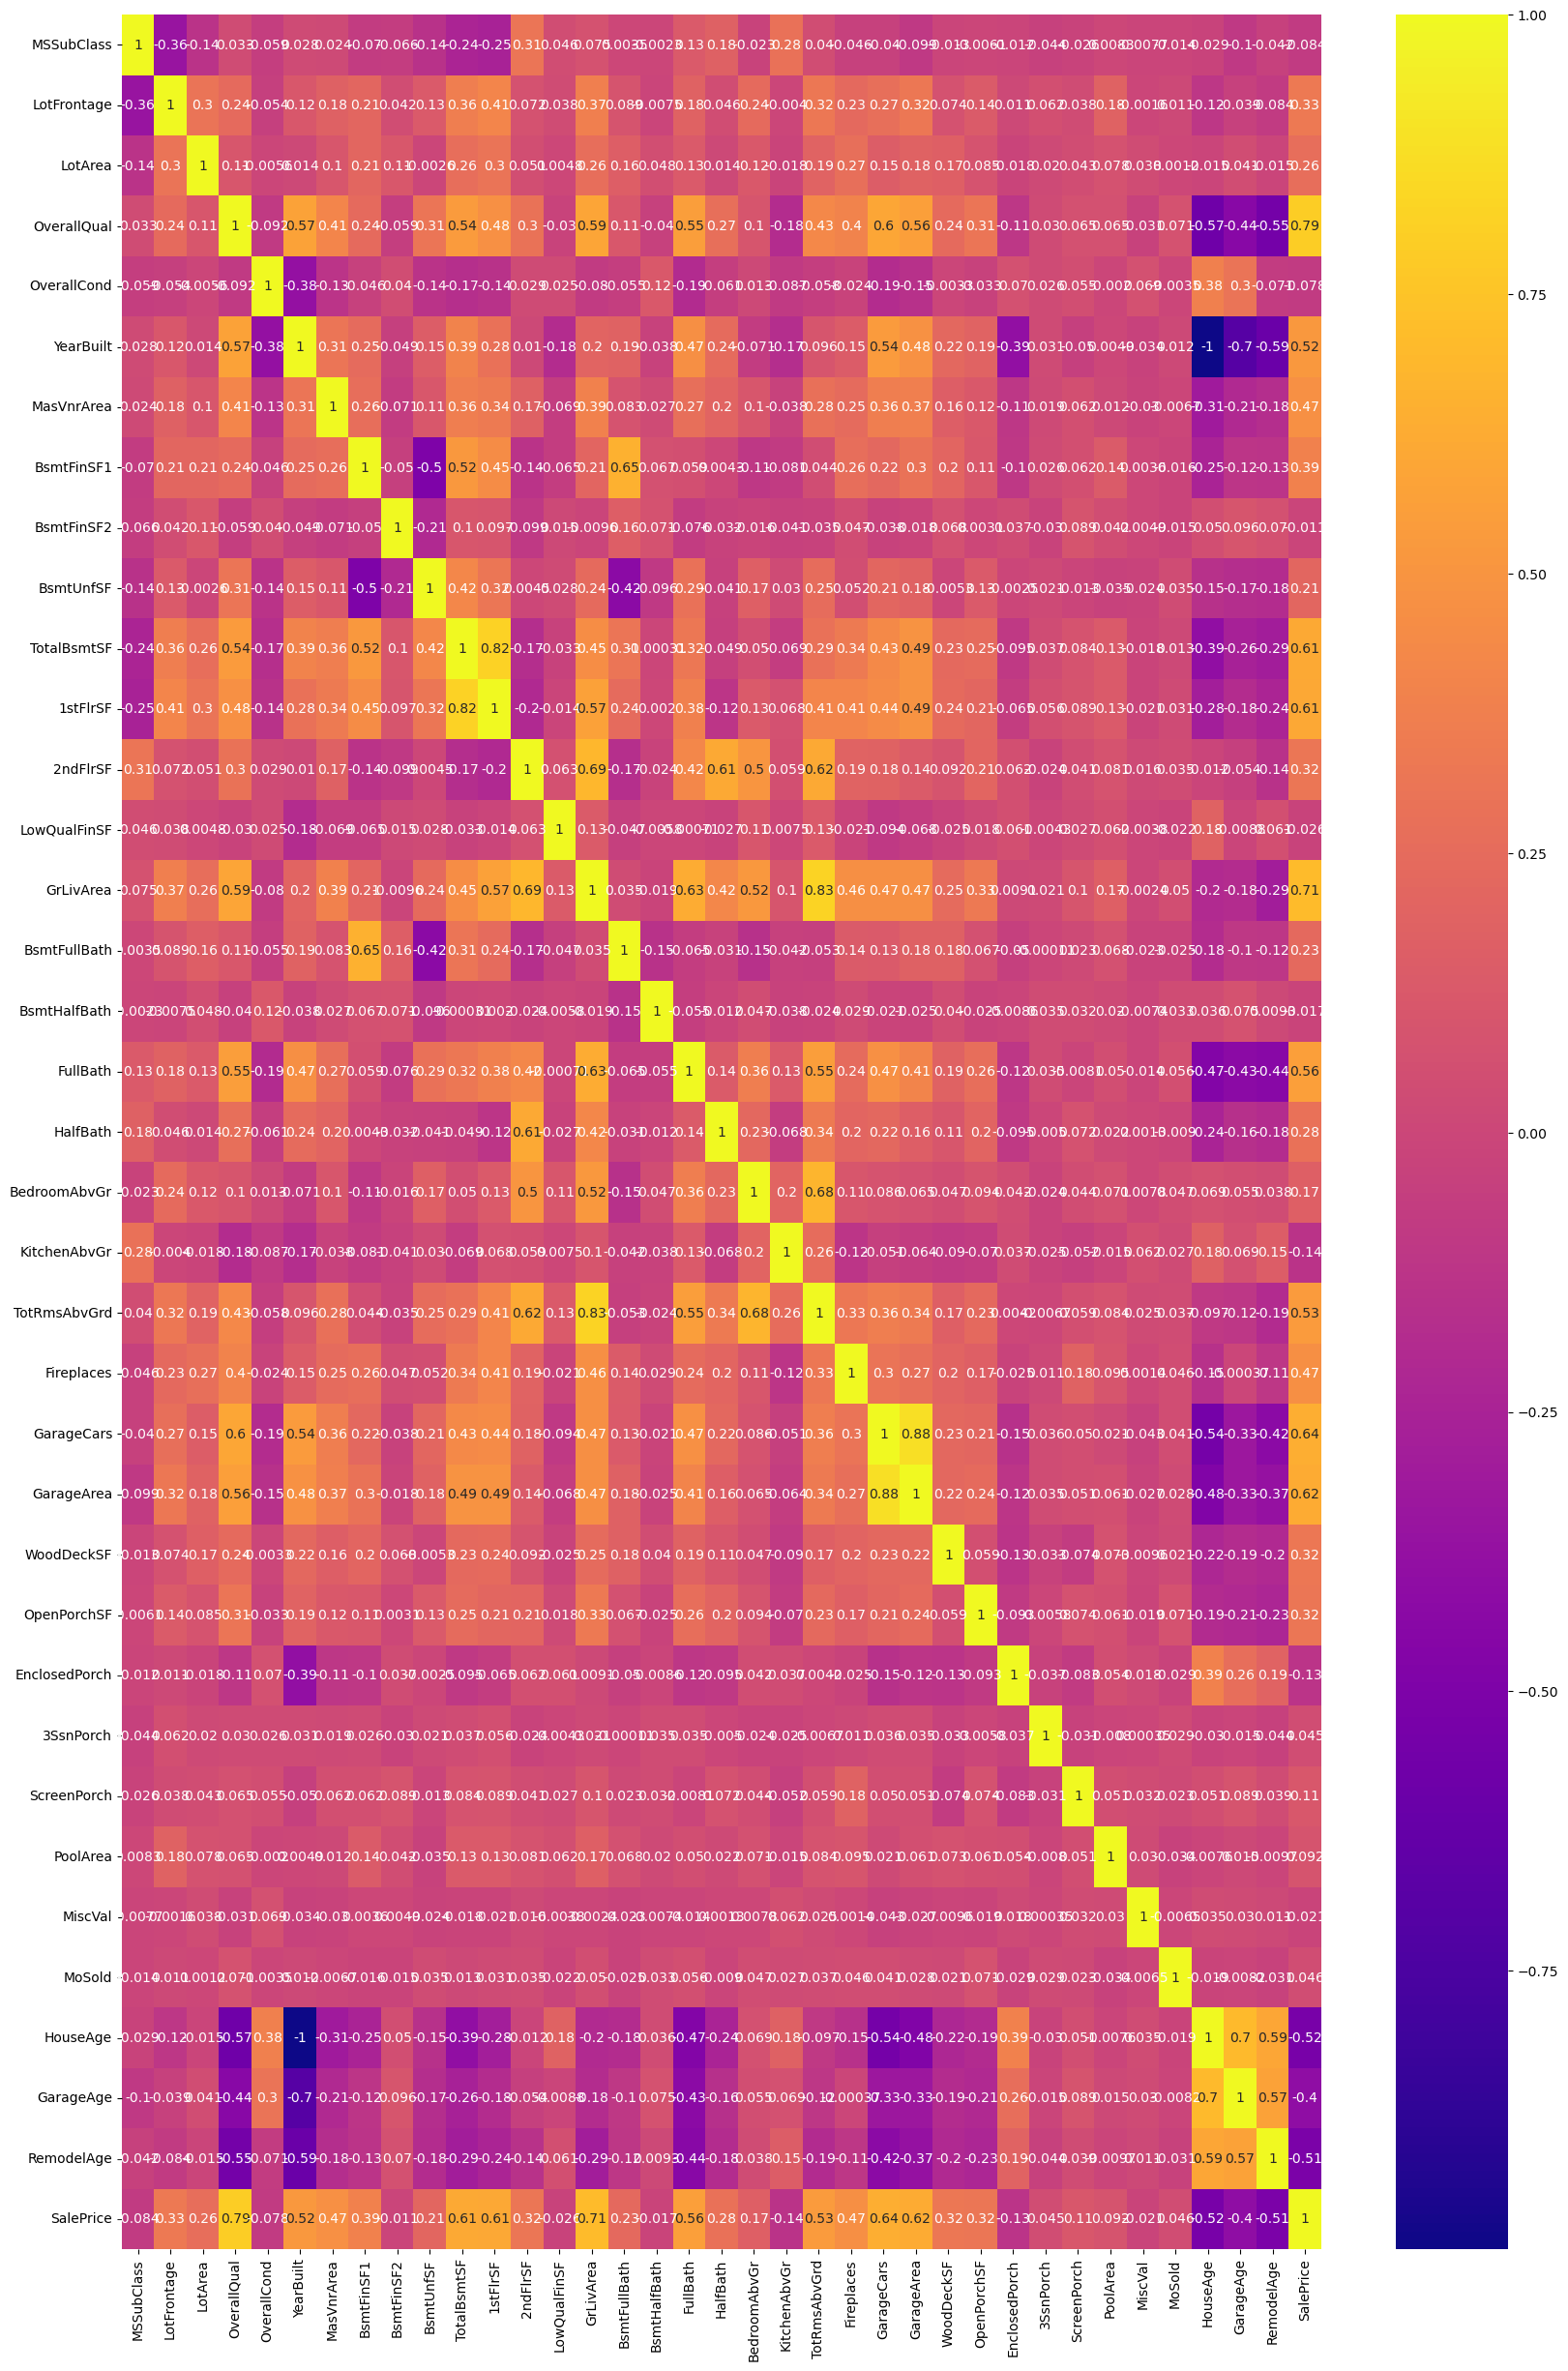

In [42]:
plt.figure(figsize=(20,30))
sns.heatmap(housetrain_df.drop(["Id","YearRemodAdd",'GarageYrBlt','YrSold'],axis=1).select_dtypes(include=np.number).corr(),annot=True,cmap="plasma")

In [43]:
for col in housetrain_df.select_dtypes(include=["object"]):
    freq=housetrain_df[col].value_counts()
    print(freq)

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
Alley
Not Available    1369
Grvl               50
Pave               41
Name: count, dtype: int64
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV    

In [44]:
# what is the average saleprice of diffrent overall cond?
housetrain_df.SalePrice.groupby(housetrain_df.OverallCond).mean()

OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    120438.438596
5    203146.914738
6    153961.591270
7    158145.487805
8    155651.736111
9    216004.545455
Name: SalePrice, dtype: float64

In [45]:
# what is the average saleprice of diffrent neighbourhood?
housetrain_df.SalePrice.groupby(housetrain_df.Neighborhood).mean()

Neighborhood
Blmngtn    194870.882353
Blueste    137500.000000
BrDale     104493.750000
BrkSide    124834.051724
ClearCr    212565.428571
CollgCr    197965.773333
Crawfor    210624.725490
Edwards    128219.700000
Gilbert    192854.506329
IDOTRR     100123.783784
MeadowV     98576.470588
Mitchel    156270.122449
NAmes      145847.080000
NPkVill    142694.444444
NWAmes     189050.068493
NoRidge    335295.317073
NridgHt    316270.623377
OldTown    128225.300885
SWISU      142591.360000
Sawyer     136793.135135
SawyerW    186555.796610
Somerst    225379.837209
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Name: SalePrice, dtype: float64

In [46]:
# what is the average saleprice of diffrent pldgtype?
housetrain_df.SalePrice.groupby(housetrain_df.BldgType).mean()

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

In [47]:
# what is the average saleprice of diffrent  overallqual?
housetrain_df.SalePrice.groupby(housetrain_df.OverallQual).mean()

OverallQual
1      50150.000000
2      51770.333333
3      87473.750000
4     108420.655172
5     133523.347607
6     161603.034759
7     207716.423197
8     274735.535714
9     367513.023256
10    438588.388889
Name: SalePrice, dtype: float64

In [48]:
# what is the average saleprice of diffrent housestyle?
housetrain_df.SalePrice.groupby(housetrain_df.HouseStyle).mean()

HouseStyle
1.5Fin    143116.740260
1.5Unf    110150.000000
1Story    175985.477961
2.5Fin    220000.000000
2.5Unf    157354.545455
2Story    210051.764045
SFoyer    135074.486486
SLvl      166703.384615
Name: SalePrice, dtype: float64

In [49]:
f=housetrain_df.select_dtypes(include=["object"]).columns
avg_sprice = {}
for fa in f:
    avg_sprice[fa]=housetrain_df.groupby(fa)["SalePrice"].mean()
for fa,avg_price in avg_sprice.items():
    print(f"avg saleprice of diffenent{fa}")
    print(avg_price)
    print("\n|")

avg saleprice of diffenentMSZoning
MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

|
avg saleprice of diffenentStreet
Street
Grvl    130190.500000
Pave    181130.538514
Name: SalePrice, dtype: float64

|
avg saleprice of diffenentAlley
Alley
Grvl             122219.080000
Not Available    183452.131483
Pave             168000.585366
Name: SalePrice, dtype: float64

|
avg saleprice of diffenentLotShape
LotShape
IR1    206101.665289
IR2    239833.365854
IR3    216036.500000
Reg    164754.818378
Name: SalePrice, dtype: float64

|
avg saleprice of diffenentLandContour
LandContour
Bnk    143104.079365
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Name: SalePrice, dtype: float64

|
avg saleprice of diffenentUtilities
Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64

|
avg saleprice of diffenentLotConfig
LotConfig
Corner

In [50]:
# test null average saleprice of different centralAir equal/identical
# test null average houseAge of different centralAir equal/identical

# test null average saleprice of different bldgtype equal/identical
# test null average houseAge of different bldgtype equal/identical

# test Null no association between bldgtype and overallqual
# test Null no association between salecondition and overallcond

In [51]:
# test null average saleprice of different centralAir equal/identical
housetrain_df.SalePrice.groupby(housetrain_df.CentralAir).mean()

CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64

In [52]:
# Null - no sigficant difference in average saleprice of different centralAir
# alter - no sigficant difference in average saleprice of different centralAir

In [53]:
no=housetrain_df[housetrain_df.CentralAir=='N']
yes=housetrain_df[housetrain_df.CentralAir=='Y']

In [54]:
from scipy.stats import ttest_ind
ttest_ind(no.SalePrice,yes.SalePrice,equal_var=False)
# since pvalue=2.280814 less than 0.05 Reject null 

TtestResult(statistic=-17.267772563668995, pvalue=2.280814388186851e-37, df=148.84017958197398)

In [55]:
#test null average houseAge of different centralAir equal/identical
housetrain_df.HouseAge.groupby(housetrain_df.CentralAir).mean()

CentralAir
N    80.294737
Y    33.503297
Name: HouseAge, dtype: float64

In [56]:
housetrain_df.HouseAge.groupby(housetrain_df.CentralAir).var()

CentralAir
N    446.380291
Y    805.474513
Name: HouseAge, dtype: float64

In [57]:
# Null - no sigficant difference in average saleprice of different centralAir
# alter - no sigficant difference in average saleprice of different centralAir

In [58]:
ttest_ind(no.HouseAge,yes.HouseAge,equal_var=False)
# since pvalue=1.509920 less than 0.05 Reject null 

TtestResult(statistic=20.34635239105087, pvalue=1.5099201635705428e-40, df=118.9632072471948)

In [59]:
#test null average saleprice of different bldgtype equal/identical
housetrain_df.SalePrice.groupby(housetrain_df.BldgType).mean()

BldgType
1Fam      185763.807377
2fmCon    128432.258065
Duplex    133541.076923
Twnhs     135911.627907
TwnhsE    181959.342105
Name: SalePrice, dtype: float64

In [60]:
# Null - no sigficant difference in average saleprice of different Bldgtype
# alter - no sigficant difference in average saleprice of different Bldgtyp

In [61]:
# split Data
singlefamily=housetrain_df[housetrain_df.BldgType=="1Fam"]
twofamily=housetrain_df[housetrain_df.BldgType=="2fmCon"]
duplex=housetrain_df[housetrain_df.BldgType=="Duplex"]
twhouse=housetrain_df[housetrain_df.BldgType=="Twnhs"]
twhouseE=housetrain_df[housetrain_df.BldgType=="TwnhsE"]

In [62]:
from scipy.stats import f_oneway

In [63]:
f_oneway(singlefamily.SalePrice,twofamily.SalePrice,duplex.SalePrice,twhouse.SalePrice,twhouseE.SalePrice)
# since pvalue=2.0567 less than 0.05 Reject null 

F_onewayResult(statistic=13.01107716962085, pvalue=2.0567364604967015e-10)

In [64]:
# test null average houseAge of different bldgtype equal/identical
housetrain_df.HouseAge.groupby(housetrain_df.BldgType).mean()

BldgType
1Fam      38.143443
2fmCon    78.677419
Duplex    40.634615
Twnhs     21.558140
TwnhsE    11.807018
Name: HouseAge, dtype: float64

In [65]:
f_oneway(singlefamily.HouseAge,twofamily.HouseAge,duplex.HouseAge,twhouse.HouseAge,twhouseE.HouseAge)
# since pvalue=1.97628 less than 0.05 Reject null 

F_onewayResult(statistic=42.08162680157346, pvalue=1.9762808133028738e-33)

In [66]:
# test no association between bldgtype and overallqual
pd.crosstab(housetrain_df.OverallQual,housetrain_df.BldgType)

BldgType,1Fam,2fmCon,Duplex,Twnhs,TwnhsE
OverallQual,,,,,
1,2,0,0,0,0
2,3,0,0,0,0
3,16,1,3,0,0
4,90,8,8,6,4
5,339,15,31,3,9
6,303,6,8,19,38
7,270,1,2,12,34
8,142,0,0,3,23
9,37,0,0,0,6


In [67]:
from scipy.stats import chi2_contingency

In [68]:
chi2_contingency(pd.crosstab(housetrain_df.OverallQual,housetrain_df.BldgType))

Chi2ContingencyResult(statistic=135.2849347696508, pvalue=2.0365051214434512e-13, dof=36, expected_freq=array([[1.67123288e+00, 4.24657534e-02, 7.12328767e-02, 5.89041096e-02,
        1.56164384e-01],
       [2.50684932e+00, 6.36986301e-02, 1.06849315e-01, 8.83561644e-02,
        2.34246575e-01],
       [1.67123288e+01, 4.24657534e-01, 7.12328767e-01, 5.89041096e-01,
        1.56164384e+00],
       [9.69315068e+01, 2.46301370e+00, 4.13150685e+00, 3.41643836e+00,
        9.05753425e+00],
       [3.31739726e+02, 8.42945205e+00, 1.41397260e+01, 1.16924658e+01,
        3.09986301e+01],
       [3.12520548e+02, 7.94109589e+00, 1.33205479e+01, 1.10150685e+01,
        2.92027397e+01],
       [2.66561644e+02, 6.77328767e+00, 1.13616438e+01, 9.39520548e+00,
        2.49082192e+01],
       [1.40383562e+02, 3.56712329e+00, 5.98356164e+00, 4.94794521e+00,
        1.31178082e+01],
       [3.59315068e+01, 9.13013699e-01, 1.53150685e+00, 1.26643836e+00,
        3.35753425e+00],
       [1.50410959e+01,

In [69]:
# test Null no association between salecondition and overallcond
pd.crosstab(housetrain_df.SaleCondition,housetrain_df.OverallCond)

OverallCond,1,2,3,4,5,6,7,8,9
SaleCondition,,,,,,,,,
Abnorml,0,2,5,5,51,18,19,0,1
AdjLand,0,0,1,0,2,1,0,0,0
Alloca,0,0,1,1,7,1,2,0,0
Family,0,0,0,2,13,2,2,1,0
Normal,1,2,18,49,628,227,182,70,21
Partial,0,1,0,0,120,3,0,1,0


In [70]:
chi2_contingency(pd.crosstab(housetrain_df.SaleCondition,housetrain_df.OverallCond))
# since p value is less than ,Reject null 

Chi2ContingencyResult(statistic=137.55985115904573, pvalue=1.2393483603234845e-12, dof=40, expected_freq=array([[6.91780822e-02, 3.45890411e-01, 1.72945205e+00, 3.94315068e+00,
        5.67952055e+01, 1.74328767e+01, 1.41815068e+01, 4.98082192e+00,
        1.52191781e+00],
       [2.73972603e-03, 1.36986301e-02, 6.84931507e-02, 1.56164384e-01,
        2.24931507e+00, 6.90410959e-01, 5.61643836e-01, 1.97260274e-01,
        6.02739726e-02],
       [8.21917808e-03, 4.10958904e-02, 2.05479452e-01, 4.68493151e-01,
        6.74794521e+00, 2.07123288e+00, 1.68493151e+00, 5.91780822e-01,
        1.80821918e-01],
       [1.36986301e-02, 6.84931507e-02, 3.42465753e-01, 7.80821918e-01,
        1.12465753e+01, 3.45205479e+00, 2.80821918e+00, 9.86301370e-01,
        3.01369863e-01],
       [8.20547945e-01, 4.10273973e+00, 2.05136986e+01, 4.67712329e+01,
        6.73669863e+02, 2.06778082e+02, 1.68212329e+02, 5.90794521e+01,
        1.80520548e+01],
       [8.56164384e-02, 4.28082192e-01, 2.14041096

In [71]:
# spilt data into numirec data
numcols=housetrain_df.select_dtypes(include=np.number)
objcols=housetrain_df.select_dtypes(include=['object'])


In [72]:
numcols.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'HouseAge', 'GarageAge', 'RemodelAge',
       'SalePrice'],
      dtype='object')

In [73]:
numcols=numcols.drop(['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold',
                      'SalePrice'],axis=1)


In [74]:
from sklearn.preprocessing import StandardScaler


In [75]:
numcols_scale=StandardScaler().fit_transform(numcols)


In [76]:
numcols_scale=pd.DataFrame(numcols_scale,columns=numcols.columns)

In [77]:
#dummy variable encoding on object data
from sklearn.preprocessing import LabelEncoder

In [78]:
objcols_encode = objcols.apply(LabelEncoder().fit_transform)

In [79]:
# concat num & obj into 1
housetrain_final=pd.concat([numcols,objcols_encode],axis=1)

In [80]:
# spilt data dependent variable (y) & independent variable(x)

In [81]:
y=housetrain_df.SalePrice
x=housetrain_final

In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
regmodel=LinearRegression().fit(x,y)

In [84]:
regmodel.score(x,y) #Rsquare between 0.60 to 0.95

0.8530688594990985

In [85]:
test_num=housetest_df.select_dtypes(include=np.number)
test_obj=housetest_df.select_dtypes(include=['object'])

In [86]:
test_num=test_num.drop(['Id','YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1)

In [87]:
test_obj=test_obj.drop('SalePrice',axis=1)

In [88]:
test_num_scale=StandardScaler().fit_transform(test_num)

In [89]:
test_num_scale=pd.DataFrame(test_num_scale,columns=test_num.columns)

In [90]:
test_obj_encode=test_obj.apply(LabelEncoder().fit_transform)

In [91]:
housetest_final=pd.concat([test_num_scale,test_obj_encode],axis=1)

In [92]:
test_reg_perd=regmodel.predict(housetest_final)

In [93]:
test_reg_perd

array([ 33885.87176289,  56253.39070658,  69086.24959615, ...,
        62957.68506962,  39192.46035408, 119495.73668895])

In [94]:
pd.DataFrame(test_reg_perd).to_csv("reghouse.csv")

In [95]:
from sklearn.tree import DecisionTreeRegressor

In [96]:
treemodel=DecisionTreeRegressor().fit(x,y)

In [97]:
treemodel.score(x,y)

1.0

In [98]:
tree_pred=treemodel.predict(housetest_final)

In [99]:
pd.DataFrame(tree_pred).to_csv("treereg.csv")

In [100]:
from sklearn.ensemble import RandomForestRegressor

In [101]:
rfmodel=RandomForestRegressor(n_estimators=2000).fit(x,y)

In [102]:
rfmodel.score(x,y)

0.9820439267206618

In [103]:
rf_pred=rfmodel.predict(housetest_final)

In [104]:
pd.DataFrame(rf_pred).to_csv("RFhouse.csv")

In [105]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
gbmodel=GradientBoostingRegressor(n_estimators=5000).fit(x,y)

In [107]:
gbmodel.score(x,y)

0.9999984468658956

In [108]:
test_gbm=gbmodel.predict(housetest_final)

In [109]:
pd.DataFrame(test_gbm).to_csv("(gbm.csv")

In [110]:
# Rerularization is a technique used to prevent overfitting by adding a penalty
# term to loss function which prevents models from assiging from assigning too much importance 
# for individual or their cofficients

# Regularization can help balance bias(underfitting) and variance (overfitting) that leads to effective model performance
# Regularization also helps in independent variable selection 
# Regularization also helps in dealing with multicollinearty
# commonly used Regualrization ;or penalized algorithms are 
# LASSO) - L1 Regularization - least absolute shrinkage Selection operator(LASSO)
# Ridge  - L2 Regularization -
# Elastic net - Both L1& L2 Regularization 


In [111]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [112]:
import warnings
warnings.filterwarnings("ignore")

In [113]:
param_grid = {'alpha':range(1,500,10)}


In [114]:
lasso=Lasso(max_iter=5000)

In [115]:
grid_srech = GridSearchCV(lasso,param_grid,cv=5,scoring='r2')

In [116]:
grid_srech.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(max_iter=5000),
             param_grid={'alpha': range(1, 500, 10)}, scoring='r2')

In [117]:
best_alpha = grid_srech.best_params_['alpha']
print(f'best alpha:{best_alpha}')

best alpha:491


In [118]:
grid_srech.best_score_

0.8108274750680808